In [1]:
import chaospy as cp
import sampling_method as sm
import numpy as np
import convergence_rate_f as crf
import compare_sti as cst
%matplotlib inline

In [2]:
%%time
k = [10, 19]
#k = dimension
N = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
#N = sample of size
leng = len(N)
R = 50
#replicated R times
NN = int(leng*R)
#define variations of the test function

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [3]:
%%time
test_function = "V-function"
#choose test function
kk = k[0]
#choose dimension
a = sm.create_coefficient_a(kk, "A1-1")
#set up test case

CPU times: user 15 µs, sys: 4 µs, total: 19 µs
Wall time: 20 µs


In [4]:
%%time
#chaospy Sobol
rule1 = "S"
#chaospy Latin Hypercube
rule2 = "L"
#Random
rule3 = "R"

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [5]:
%%time
er_si_N_1, er_sti_N_11, er_sti_N_12 = cst.n_calculate_compare_sti(kk, N, a, R, rule1, test_function)
#calculate estimated S_i, S_ti_1(Jansen 1999), S_ti_2(Sobol' 2007) for rule1

CPU times: user 12min 52s, sys: 8.95 s, total: 13min 1s
Wall time: 12min 56s


In [6]:
%%time
er_si_N_2, er_sti_N_21, er_sti_N_22 = cst.n_calculate_compare_sti(kk, N, a, R, rule2, test_function)
#calculate estimated S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for rule2

CPU times: user 8min 11s, sys: 8.02 s, total: 8min 19s
Wall time: 8min 15s


In [32]:
%%time
er_si_N_3, er_sti_N_31, er_sti_N_32 = cst.n_calculate_compare_sti(kk, N, a, R, rule3, test_function)
#calculate estimated S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for rule3

CPU times: user 7min 47s, sys: 14.5 s, total: 8min 2s
Wall time: 7min 51s


In [33]:
%%time
er_si_max_1 = er_si_N_1[(NN-R):NN, :]
er_sti_max_11 = er_sti_N_11[(NN-R):NN, :]
er_sti_max_12 = er_sti_N_12[(NN-R):NN, :]
#get the S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) of rule1 for max N 

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 12.9 µs


In [34]:
%%time
er_si_max_2 = er_si_N_2[(NN-R):NN, :]
er_sti_max_21 = er_sti_N_21[(NN-R):NN, :]
er_sti_max_22 = er_sti_N_22[(NN-R):NN, :]
#get the S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) of rule2 for max N 

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 13.8 µs


In [35]:
%%time
er_si_max_3 = er_si_N_3[(NN-R):NN, :]
er_sti_max_31 = er_sti_N_31[(NN-R):NN, :]
er_sti_max_32 = er_sti_N_32[(NN-R):NN, :]
#get the S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) of rule3 for max N 

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 15 µs


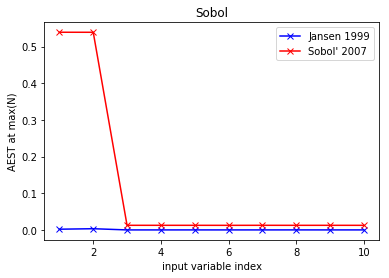

CPU times: user 180 ms, sys: 6.13 ms, total: 186 ms
Wall time: 184 ms


In [36]:
%%time
name_1 = "Sobol"
cst.draw_aest_compare_plot(kk, a, R, er_si_max_1, er_sti_max_11, er_sti_max_12, name_1)
#draw comparison plot i-wise errors AEST at max N for S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for Sobol

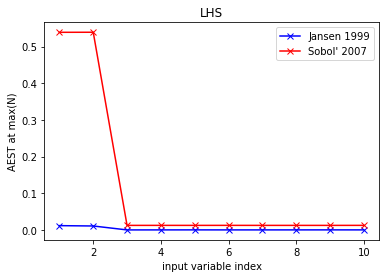

CPU times: user 125 ms, sys: 3.69 ms, total: 129 ms
Wall time: 127 ms


In [37]:
%%time
name_2 = "LHS"
cst.draw_aest_compare_plot(kk, a, R, er_si_max_2, er_sti_max_21, er_sti_max_22, name_2)
#draw comparison plot i-wise errors AEST at max N for S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for LHS

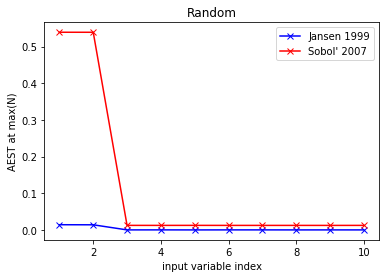

CPU times: user 128 ms, sys: 4.53 ms, total: 133 ms
Wall time: 131 ms


In [38]:
%%time
name_3 = "Random"
cst.draw_aest_compare_plot(kk, a, R, er_si_max_3, er_sti_max_31, er_sti_max_32, name_3)
#draw comparison plot i-wise errors AEST at max N for S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for Random

In [39]:
%%time
aes_1_N, aest_11_N, aest_12_N = cst.aes_aest_N(N, kk, R, a, er_si_N_1, er_sti_N_11, er_sti_N_12)
maes_1, maest_11, maest_12 = cst.maes_maest_N(N, kk, aes_1_N, aest_11_N, aest_12_N)
#calculate convergence MAES and MAEST with both S_ti way for rule1

CPU times: user 9.82 ms, sys: 3.56 ms, total: 13.4 ms
Wall time: 10.4 ms


In [40]:
%%time
aes_2_N, aest_21_N, aest_22_N = cst.aes_aest_N(N, kk, R, a, er_si_N_2, er_sti_N_21, er_sti_N_22)
maes_2, maest_21, maest_22 = cst.maes_maest_N(N, kk, aes_2_N, aest_21_N, aest_22_N)
#calculate convergence MAES and MAEST with both S_ti way for rule2

CPU times: user 9.61 ms, sys: 4.39 ms, total: 14 ms
Wall time: 10.7 ms


In [41]:
%%time
aes_3_N, aest_31_N, aest_32_N = cst.aes_aest_N(N, kk, R, a, er_si_N_3, er_sti_N_31, er_sti_N_32)
maes_3, maest_31, maest_32 = cst.maes_maest_N(N, kk, aes_3_N, aest_31_N, aest_32_N)
#calculate convergence MAES and MAEST with both S_ti way for rule3

CPU times: user 9.37 ms, sys: 4.59 ms, total: 14 ms
Wall time: 10.5 ms


In [42]:
%%time
name_z = ["Sobol MAEST - Jansen 1999", "Sobol MAEST - Sobol' 2007"
          , "LHS MAEST - Jansen 1999", "LHS MAEST - Sobol' 2007"
         , "Random MAEST - Jansen 1999", "Random MAEST - Sobol' 2007"]
z_11 = crf.convergence_rate(N, maest_11, name_z[0])
z_12 = crf.convergence_rate(N, maest_12, name_z[1])
z_21 = crf.convergence_rate(N, maest_21, name_z[2])
z_22 = crf.convergence_rate(N, maest_22, name_z[3])
z_31 = crf.convergence_rate(N, maest_31, name_z[4])
z_32 = crf.convergence_rate(N, maest_32, name_z[5])

Sobol MAEST - Jansen 1999 convergence rate =  1.09900744263
-------------------------------------
Sobol MAEST - Sobol' 2007 convergence rate =  0.131507401718
-------------------------------------
LHS MAEST - Jansen 1999 convergence rate =  0.704250441821
-------------------------------------
LHS MAEST - Sobol' 2007 convergence rate =  0.0852613141091
-------------------------------------
Random MAEST - Jansen 1999 convergence rate =  0.642406275268
-------------------------------------
Random MAEST - Sobol' 2007 convergence rate =  0.0721102919981
-------------------------------------
CPU times: user 3.1 ms, sys: 1.92 ms, total: 5.02 ms
Wall time: 3.51 ms


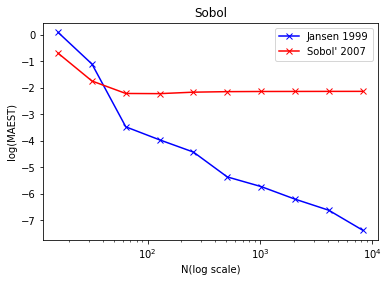

CPU times: user 285 ms, sys: 4.24 ms, total: 289 ms
Wall time: 287 ms


In [43]:
%%time
cst.draw_maest_compare_plot(N, maest_11, maest_12, name_1)
#draw convergence log(MAEST) comparison plot for Sobol

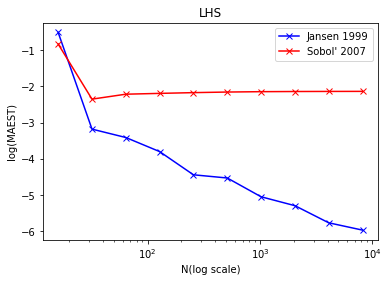

CPU times: user 287 ms, sys: 4.53 ms, total: 291 ms
Wall time: 289 ms


In [44]:
%%time
cst.draw_maest_compare_plot(N, maest_21, maest_22, name_2)
#draw convergence log(MAEST) comparison plot for LHS

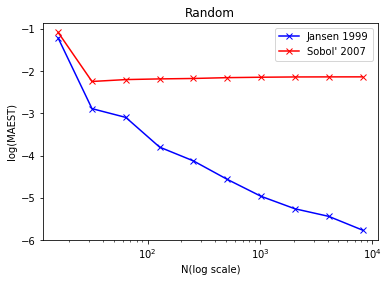

CPU times: user 277 ms, sys: 4.31 ms, total: 282 ms
Wall time: 280 ms


In [45]:
%%time
cst.draw_maest_compare_plot(N, maest_31, maest_32, name_3)
#draw convergence log(MAEST) comparison plot for Random

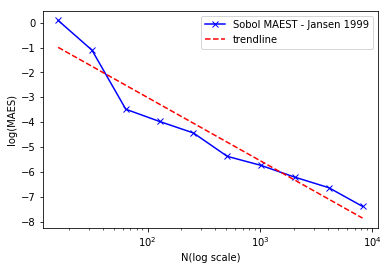

CPU times: user 286 ms, sys: 4.42 ms, total: 291 ms
Wall time: 289 ms


In [46]:
%%time
crf.check_trend_line(z_11, N, maest_11, name_z[0])

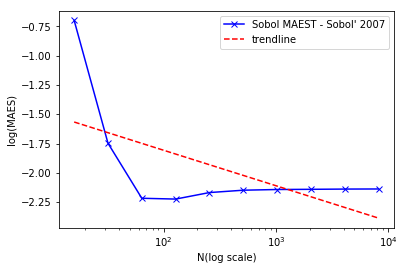

CPU times: user 338 ms, sys: 5.04 ms, total: 343 ms
Wall time: 342 ms


In [47]:
%%time
crf.check_trend_line(z_12, N, maest_12, name_z[1])

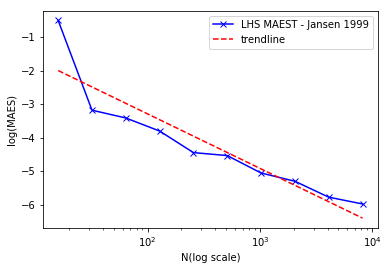

CPU times: user 326 ms, sys: 4.74 ms, total: 331 ms
Wall time: 328 ms


In [48]:
%%time
crf.check_trend_line(z_21, N, maest_21, name_z[2])

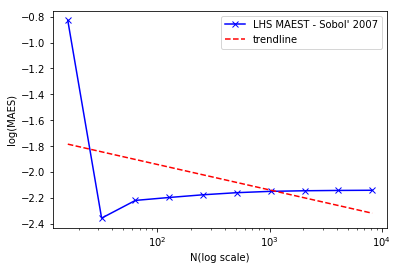

CPU times: user 355 ms, sys: 8.46 ms, total: 364 ms
Wall time: 358 ms


In [49]:
%%time
crf.check_trend_line(z_22, N, maest_22, name_z[3])

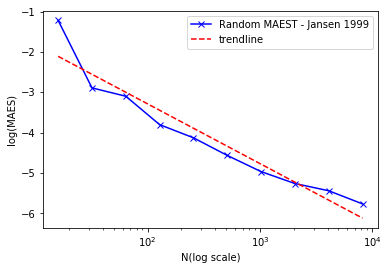

CPU times: user 278 ms, sys: 3.4 ms, total: 281 ms
Wall time: 280 ms


In [50]:
%%time
crf.check_trend_line(z_31, N, maest_31, name_z[4])

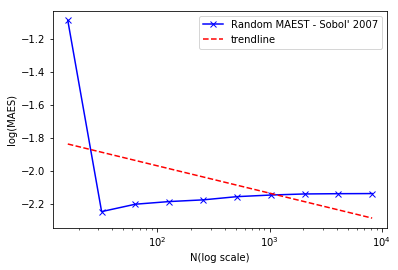

CPU times: user 280 ms, sys: 4.06 ms, total: 284 ms
Wall time: 282 ms


In [51]:
%%time
crf.check_trend_line(z_32, N, maest_32, name_z[5])

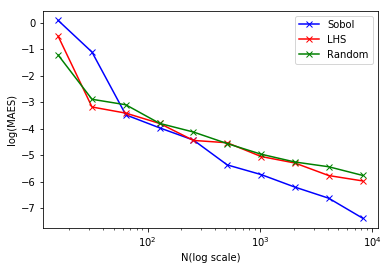

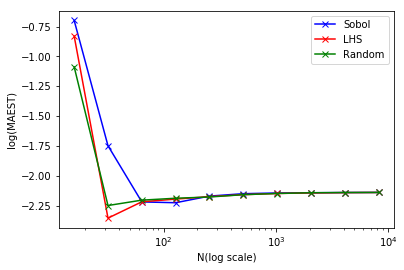

CPU times: user 660 ms, sys: 8.32 ms, total: 669 ms
Wall time: 667 ms


In [53]:
%%time
import calculation_plot as calp
calp.draw_maes_plot(N, maest_11, maest_21, maest_31, maest_12, maest_22, maest_32)